In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data= pd.read_csv('Sales.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [5]:
data.describe(include='object')

,Brands,Models,Colors,Memory,Storage,Camera,Mobile
count,3114,3114,3114,3071,3075,3114,3114
unique,17,914,639,26,26,1,928
top,SAMSUNG,iPhone 11,Black,4 GB,64 GB,Yes,Apple iPhone 11
freq,719,36,489,750,774,3114,36


In [6]:
data.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


In [7]:
data.describe(include='object')

,Brands,Models,Colors,Memory,Storage,Camera,Mobile
count,3114,3114,3114,3071,3075,3114,3114
unique,17,914,639,26,26,1,928
top,SAMSUNG,iPhone 11,Black,4 GB,64 GB,Yes,Apple iPhone 11
freq,719,36,489,750,774,3114,36


In [8]:
data.duplicated().sum()

108

In [9]:
data.drop_duplicates(keep="first", inplace=True)

In [10]:
data.duplicated().sum()

0

# Explorartory data analysis

#### 1. Brand wise distribution

In [11]:
brands = data['Brands'].value_counts()
brands

Brands
SAMSUNG         704
Apple           324
realme          322
OPPO            257
Nokia           199
Xiaomi          198
Infinix         150
GIONEE          128
vivo            124
Lenovo          117
ASUS            117
Motorola        104
LG               99
POCO             74
HTC              55
Google Pixel     29
IQOO              5
Name: count, dtype: int64

In [12]:
explode =[0 for i in range(len(brands))]
explode[0]=0.2
explode[1]=0.1

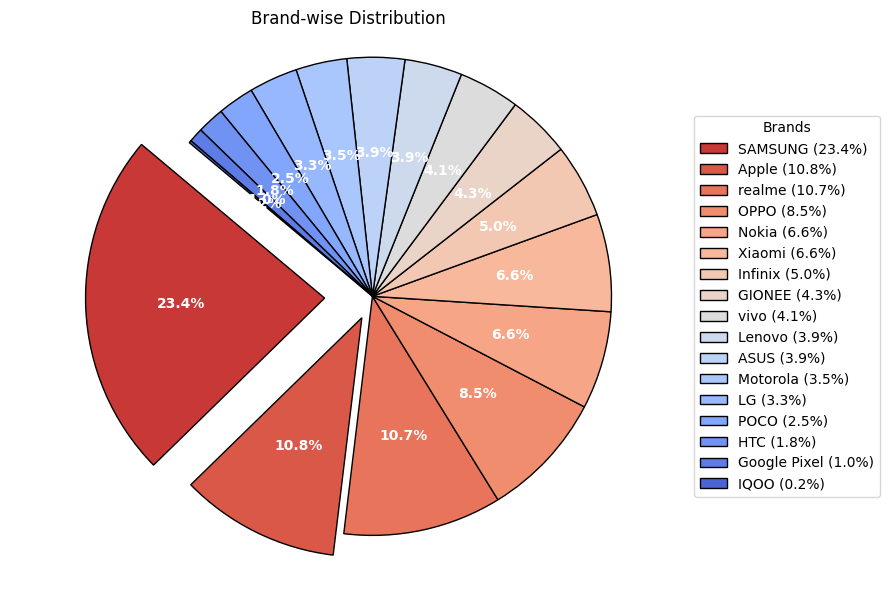

In [13]:
# Create a color palette and reverse it
colors = sns.color_palette("coolwarm", len(brands))[::-1]

# Explode values to highlight slices
explode = [0] * len(brands)
explode[0] = 0.2
explode[1] = 0.1

fig, ax = plt.subplots(figsize=(9, 6))

# Create the pie chart with custom colors and explode values
wedges, texts, autotexts = ax.pie(
    brands,
    explode=explode,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(edgecolor='black')  # Use wedgeprops to set the edge color
)

# Customize legend
percentages = [f'{p:.1f}%' for p in (brands / brands.sum() * 100)]
legend_labels = [f'{label} ({percentage})' for label, percentage in zip(brands.index, percentages)]
plt.legend(wedges, legend_labels, loc='center left', bbox_to_anchor=(1, 0.5), title='Brands')

# Customize font properties for better readability
plt.setp(autotexts, size=10, weight='bold', color='white')
plt.setp(texts, size=10, weight='bold')

plt.title("Brand-wise Distribution")
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()


We can see the majority of the products are from the brand "Samsung" followed by "Apple" and "Realme".

## Model wise distribution

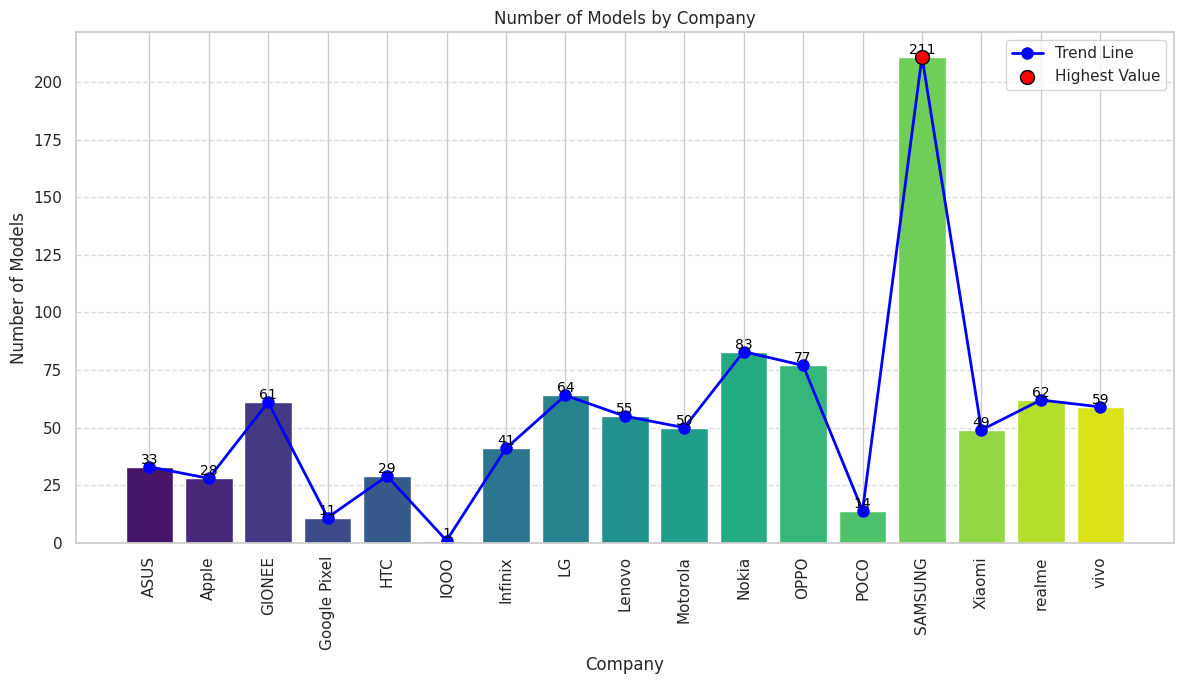

In [14]:
# Calculate the number of unique models by company
models_of_company = data.groupby('Brands')['Models'].nunique()

# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 7))

# Title of the plot
plt.title('Number of Models by Company')

# Create the bar plot with a custom color palette
custom_palette = sns.color_palette("viridis", len(models_of_company))

# Create the bar plot
bars = plt.bar(models_of_company.index, models_of_company.values, color=custom_palette)

# Add a curve line
x = np.arange(len(models_of_company))
plt.plot(x, models_of_company.values, color='blue', marker='o', linestyle='-', linewidth=2, markersize=8, label='Trend Line')

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', va='bottom', ha='center', fontsize=10, color='black')

# Mark the highest value
max_value = models_of_company.max()
max_index = models_of_company.idxmax()
plt.scatter(max_index, max_value, color='red', s=100, edgecolor='black', zorder=5, label='Highest Value')

# Add a legend
plt.legend()

# Customize x-axis and y-axis labels
plt.xlabel('Company')
plt.ylabel('Number of Models')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

We can see **samsung** has the most number of models in the dataset.

In [15]:
color_count = data.Colors.value_counts()

color_count=color_count.head(10)
color_count


Colors
Black             465
Gold              187
White             148
Blue              134
Silver             98
Red                71
Grey               44
Midnight Black     35
Space Grey         31
Rose Gold          29
Name: count, dtype: int64

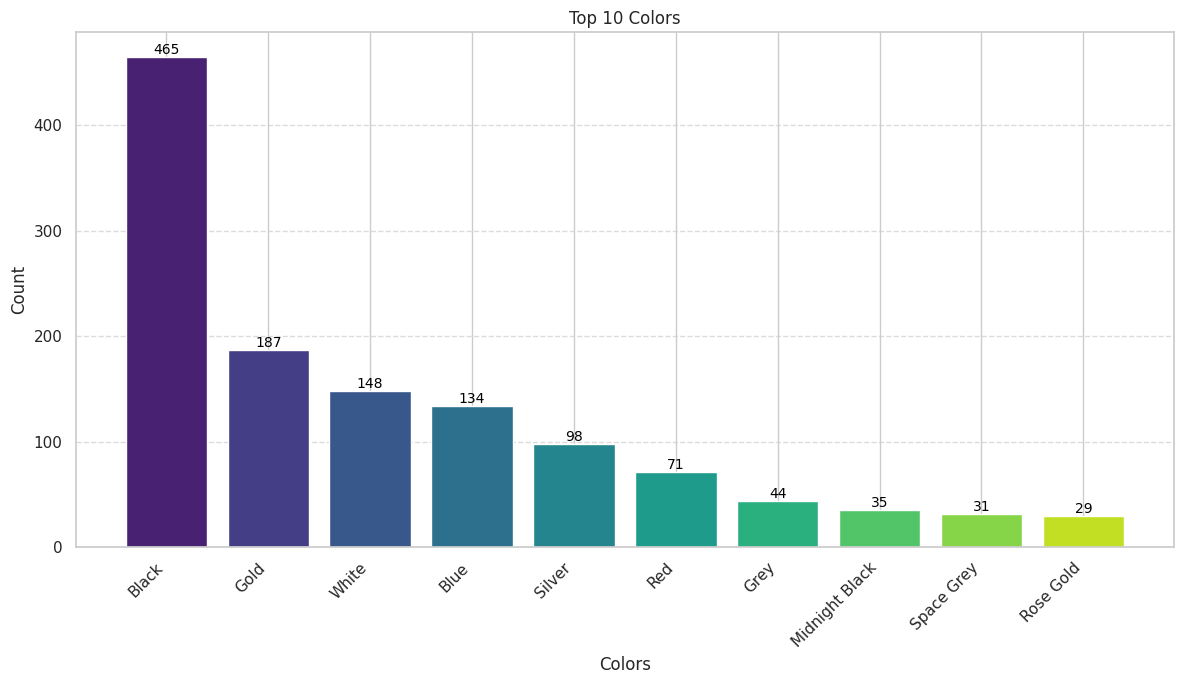

In [16]:
# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 7))

# Title of the plot
plt.title("Top 10 Colors")

# Create the bar plot with a custom color palette
# If you want to use a color palette, choose a suitable one or create a custom one
custom_palette = sns.color_palette("viridis", len(color_count))

# Create the bar plot
bars = plt.bar(color_count.index, color_count.values, color=custom_palette)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval}', va='bottom', ha='center', fontsize=10, color='black')

# Customize x-axis and y-axis labels
plt.xlabel('Colors')
plt.ylabel('Count')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [17]:
brand_rating = data[["Brands","Rating"]]
brand_rating = brand_rating.dropna()
brand_rating

,Brands,Rating
0,SAMSUNG,4.3
1,Nokia,3.8
2,realme,4.4
3,Infinix,4.2
4,Apple,4.6
...,...,...
3104,LG,3.8
3107,SAMSUNG,4.0
3108,SAMSUNG,4.2
3109,POCO,4.4


/tmp/ipykernel_2871/1674114097.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Mean_agg_rating.index, x=Mean_agg_rating.values, palette=custom_palette)


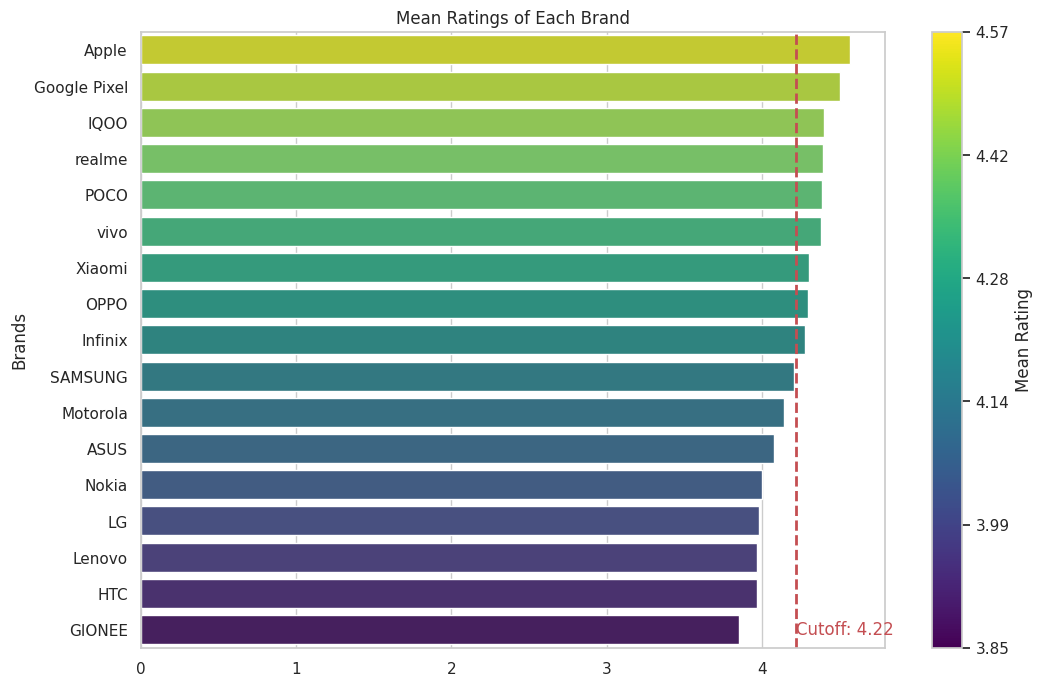

In [18]:
# Calculate mean rating for each brand and sort
Mean_agg_rating = brand_rating.groupby('Brands').mean('Rating')
Mean_agg_rating = Mean_agg_rating.Rating.sort_values(ascending=False)

# Calculate the cutoff value
cutoff_value = Mean_agg_rating.mean()  # Set your cutoff value

# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Title of the plot
plt.title("Mean Ratings of Each Brand")

# Create the horizontal bar plot with a custom color palette
custom_palette = sns.color_palette("viridis", len(Mean_agg_rating))[::-1]
sns.barplot(y=Mean_agg_rating.index, x=Mean_agg_rating.values, palette=custom_palette)

# Draw the cutoff line
plt.axvline(x=cutoff_value, color='r', linestyle='--', linewidth=2)

# Add a label for the cutoff line
plt.text(cutoff_value, len(Mean_agg_rating) - 1, f'Cutoff: {cutoff_value:.2f}', color='r', va='center')

# Add a color bar
norm = plt.Normalize(Mean_agg_rating.min(), Mean_agg_rating.max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Mean Rating')
cbar.set_ticks(np.linspace(Mean_agg_rating.min(), Mean_agg_rating.max(), 6))
cbar.set_ticklabels([f'{x:.2f}' for x in np.linspace(Mean_agg_rating.min(), Mean_agg_rating.max(), 6)])

# Show the plot
plt.show()

In [19]:
mobile_discount = data[["Mobile","Selling Price","Original Price","Discount"]]
mobile_discount

,Mobile,Selling Price,Original Price,Discount
0,SAMSUNG GALAXY M31S,19330,20999,1669
1,Nokia 3.2,10199,10199,0
2,realme C2,6999,7999,1000
3,Infinix Note 5,12999,12999,0
4,Apple iPhone 11,49900,49900,0
...,...,...,...,...
3107,SAMSUNG Galaxy S Duos 2,5999,5999,0
3108,SAMSUNG Metro 313,2299,2299,0
3109,POCO M4 Pro 5G,16999,19999,3000
3112,Apple iPhone 13 Pro,119900,119900,0


In [20]:
mobile_discount.sort_values("Discount") #oppo cheating customers

,Mobile,Selling Price,Original Price,Discount
2137,OPPO A5s,12990,4990,-8000
3113,GIONEE F9,7900,7900,0
1270,Apple iPhone 12 Pro Max,119900,119900,0
1269,OPPO F3 Plus,22990,22990,0
2264,Xiaomi Redmi Y3,9950,9950,0
...,...,...,...,...
507,LG Wing,29999,80000,50001
306,ASUS ROG,26499,83999,57500
848,Motorola Razr 5G,89999,149999,60000
589,Motorola Razr,74999,149999,75000


In [21]:
top_5_mobiles = mobile_discount.sort_values("Discount",ascending=False).head(5)
top_5_mobiles = top_5_mobiles[['Mobile','Original Price','Discount']]
top_5_mobiles

,Mobile,Original Price,Discount
711,Motorola Razr,149999,75000
589,Motorola Razr,149999,75000
848,Motorola Razr 5G,149999,60000
306,ASUS ROG,83999,57500
507,LG Wing,80000,50001


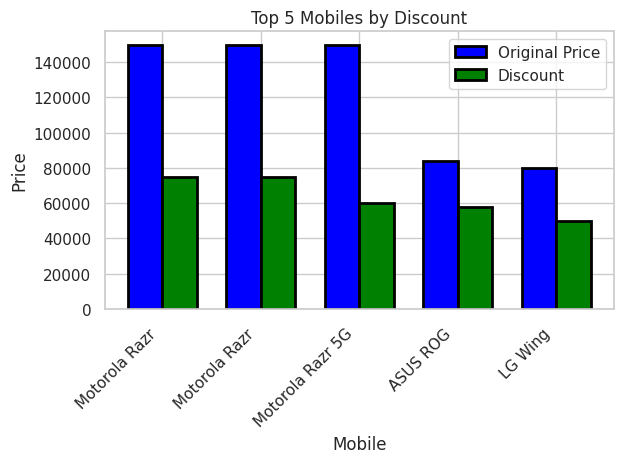

In [22]:
bar_width = 0.35
index = np.arange(len(top_5_mobiles['Mobile']))
fig, ax = plt.subplots()
bar1 = ax.bar(index, top_5_mobiles['Original Price'], bar_width, color='blue', edgecolor='black', linewidth=2, label='Original Price')
bar2 = ax.bar(index + bar_width, top_5_mobiles['Discount'], bar_width, color='green', edgecolor='black', linewidth=2, label='Discount')
ax.set_xlabel('Mobile')
ax.set_ylabel('Price')
ax.set_title('Top 5 Mobiles by Discount')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_5_mobiles['Mobile'], rotation=45, ha='right')

# Adding a legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_2871/4109031217.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Mean_agg_discount.values, y=Mean_agg_discount.index, palette=custom_palette, hue=None)


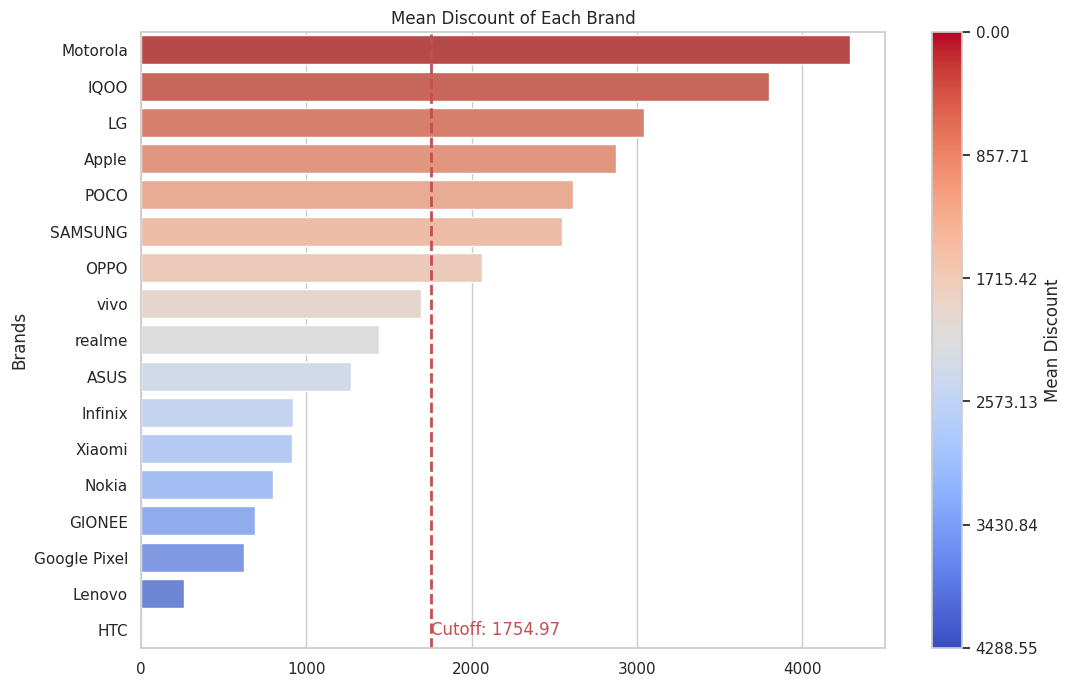

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming data is already defined as a DataFrame and contains the 'Brands' and 'Discount' columns
# Replace it with your actual DataFrame

# Calculate mean discount for each brand and sort
Mean_agg_discount = data.groupby('Brands').mean('Discount')
Mean_agg_discount = Mean_agg_discount.Discount.sort_values(ascending=False)

# Calculate the cutoff value
cutoff_value = Mean_agg_discount.mean()  # Set your cutoff value

# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))
plt.title("Mean Discount of Each Brand")

# Create the bar plot without hue
custom_palette = sns.color_palette("coolwarm", len(Mean_agg_discount))[::-1]  # Reverse the palette to match the sorted order
sns.barplot(x=Mean_agg_discount.values, y=Mean_agg_discount.index, palette=custom_palette, hue=None)

# Draw the cutoff line
plt.axvline(x=cutoff_value, color='r', linestyle='--', linewidth=2)

# Optionally, add a label for the cutoff line
plt.text(cutoff_value, len(Mean_agg_discount) - 1, f'Cutoff: {cutoff_value:.2f}', color='r', va='center')

# Add a color bar
norm = plt.Normalize(Mean_agg_discount.min(), Mean_agg_discount.max())
sm = plt.cm.ScalarMappable(cmap=plt.cm.coolwarm, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Mean Discount')
cbar.set_ticks(np.linspace(Mean_agg_discount.min(), Mean_agg_discount.max(), 6))
cbar.set_ticklabels([f'{x:.2f}' for x in np.linspace(Mean_agg_discount.min(), Mean_agg_discount.max(), 6)][::-1])  # Reverse the tick labels

# Show the plot
plt.show()


/tmp/ipykernel_2871/1590882873.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=Mean_agg_saleprice.index, x=Mean_agg_saleprice.values, palette=custom_palette)


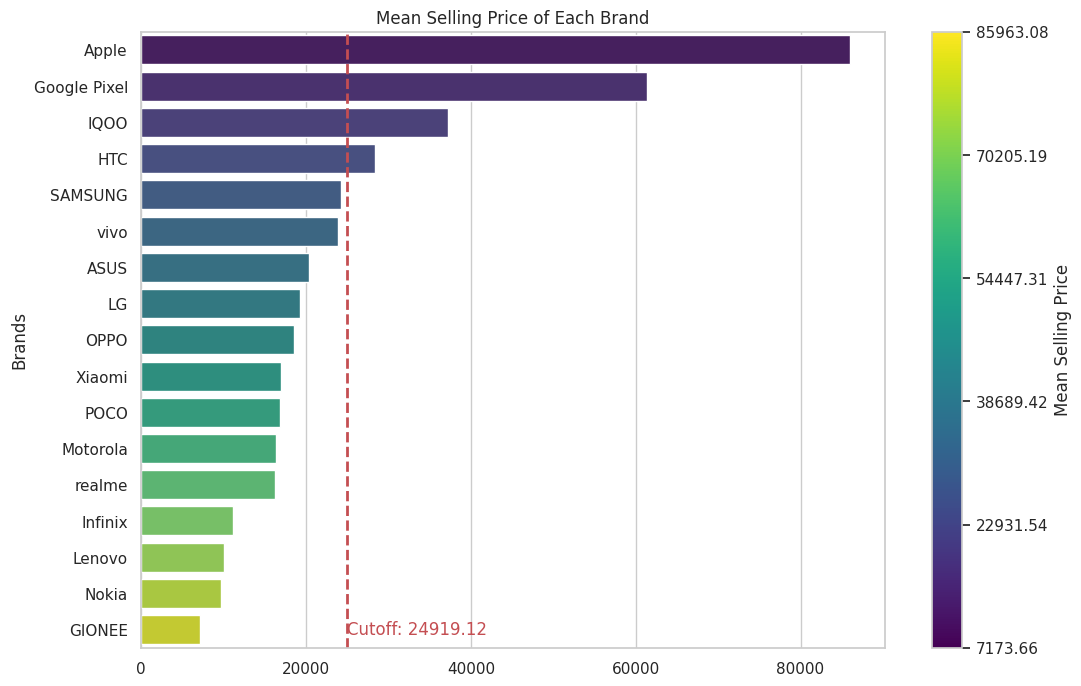

In [24]:
# Calculate mean selling price for each brand and sort
Mean_agg_saleprice = data.groupby('Brands').mean('Selling Price')
Mean_agg_saleprice = Mean_agg_saleprice['Selling Price'].sort_values(ascending=False)

# Calculate the cutoff value
cutoff_value = Mean_agg_saleprice.mean()  # Set your cutoff value

# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Title of the plot
plt.title("Mean Selling Price of Each Brand")

# Create the horizontal bar plot
custom_palette = sns.color_palette("viridis", len(Mean_agg_saleprice))
sns.barplot(y=Mean_agg_saleprice.index, x=Mean_agg_saleprice.values, palette=custom_palette)

# Draw the cutoff line
plt.axvline(x=cutoff_value, color='r', linestyle='--', linewidth=2)

# Optionally, add a label for the cutoff line
plt.text(cutoff_value, len(Mean_agg_saleprice) - 1, f'Cutoff: {cutoff_value:.2f}', color='r', va='center')

# Add a color bar
norm = plt.Normalize(Mean_agg_saleprice.min(), Mean_agg_saleprice.max())
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())
cbar.set_label('Mean Selling Price')
cbar.set_ticks(np.linspace(Mean_agg_saleprice.min(), Mean_agg_saleprice.max(), 6))
cbar.set_ticklabels([f'{x:.2f}' for x in np.linspace(Mean_agg_saleprice.min(), Mean_agg_saleprice.max(), 6)])

# Show the plot
plt.show()

In [25]:
selling_price = data[["Mobile","Selling Price"]].sort_values("Selling Price",ascending=False)
sellingprice_agg_mobile = selling_price.groupby("Mobile").mean("Selling Price")

In [26]:
t5ag = sellingprice_agg_mobile.head(5)
#t5ag
l5ag = sellingprice_agg_mobile.tail(5)
#l5ag
t5sp = selling_price.head(5)
#t5sp
l5sp = selling_price.tail(5)
#l5sp

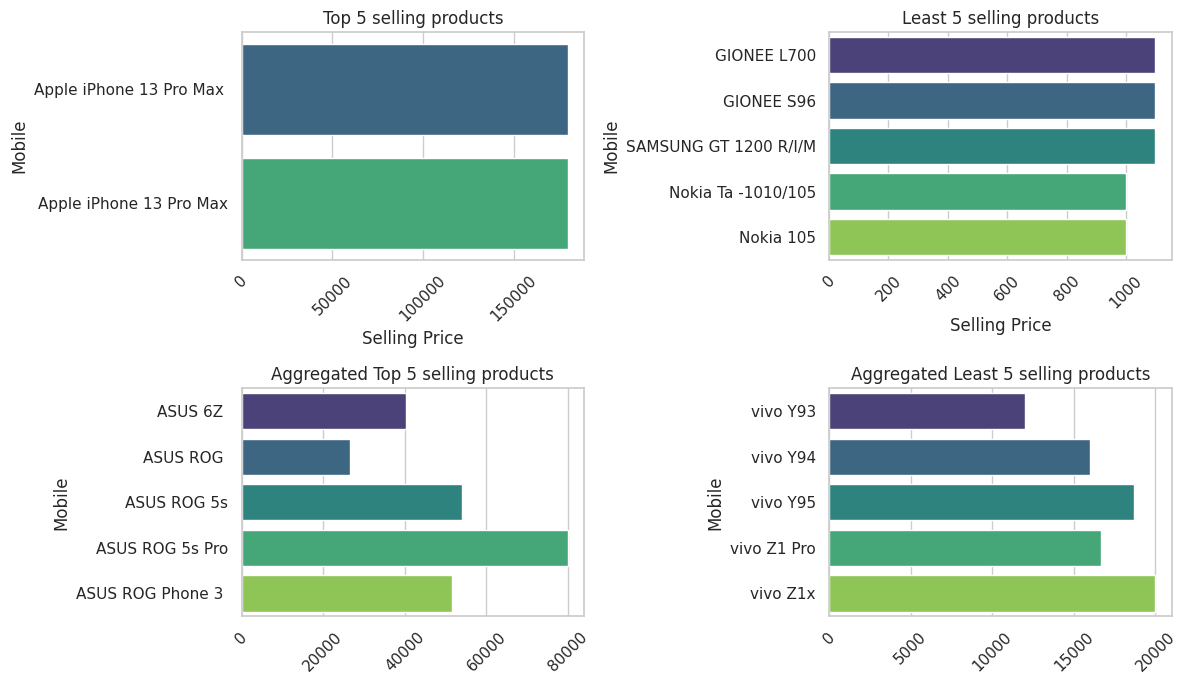

In [27]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

# Top 5 selling products
plt.subplot(221)
sns.barplot(y=t5sp.Mobile, x=t5sp['Selling Price'], hue=t5sp.Mobile, palette='viridis', dodge=False, legend=False)
plt.title("Top 5 selling products")
plt.xticks(rotation=45)

# Least 5 selling products
plt.subplot(222)
sns.barplot(y=l5sp.Mobile, x=l5sp['Selling Price'], hue=l5sp.Mobile, palette='viridis', dodge=False, legend=False)
plt.title("Least 5 selling products")
plt.xticks(rotation=45)

# Aggregated Top 5 selling products
plt.subplot(223)
sns.barplot(y=t5ag.index, x=t5ag['Selling Price'].values, hue=t5ag.index, palette='viridis', dodge=False, legend=False)
plt.title("Aggregated Top 5 selling products")
plt.xticks(rotation=45)

# Aggregated Least 5 selling products
plt.subplot(224)
sns.barplot(y=l5ag.index, x=l5ag['Selling Price'].values, hue=l5ag.index, palette='viridis', dodge=False, legend=False)
plt.title("Aggregated Least 5 selling products")
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
from sklearn.preprocessing import OrdinalEncoder

In [29]:
def toMB(value):
    try :
        if 'MB' in value:
            return int(float(value.replace('MB', '').strip()))
        elif 'GB' in value:
            return int(float(value.replace('GB', '').strip()) * 1024)
        elif 'TB' in value:
            return int(float(value.replace('TB', '').strip()) * 1024 * 1024)
    except:
        print(value)
        return value
    
def conversiontoMB(data):
    data_converted = data.copy()
    data_converted['Memory'] = data['Memory'].dropna().apply(toMB)
    data_converted[["Storage"]] = data_converted[["Storage"]].replace("Expandable Upto 32 GB", "32 GB")
    data_converted[["Storage"]] = data_converted[["Storage"]].replace("Expandable Upto 16 GB", "16 GB")
    data_converted['Storage'] = data_converted['Storage'].dropna().apply(toMB)
    return data_converted


In [30]:
data_converted = conversiontoMB(data)

data_converted = data_converted.dropna().drop(columns=['Camera'])

categorical_columns = data_converted.select_dtypes(include=['object']).columns

ordinal_encoder = OrdinalEncoder()

data_converted[categorical_columns] = ordinal_encoder.fit_transform(data_converted[categorical_columns])

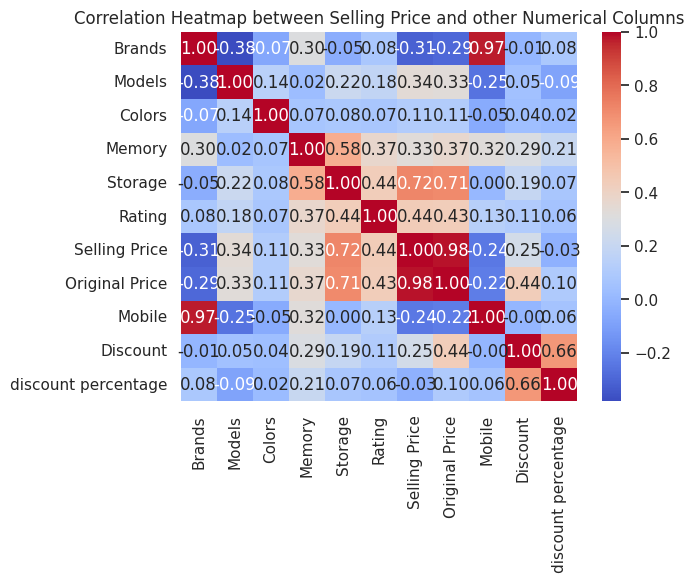

In [31]:
plt.figure()
sns.heatmap(data_converted.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Selling Price and other Numerical Columns')
plt.show()

In [32]:
color_vs_price = data[['Colors','Selling Price']].sort_values(by='Selling Price',ascending=False)
color_vs_price

,Colors,Selling Price
1185,Sierra Blue,179900
813,Graphite,179900
2032,Graphite,179900
903,Silver,179900
1285,Silver,179900
...,...,...
978,Black,1099
2487,Black,1099
1338,Black,1099
2054,Black,1000


In [33]:
from sklearn.preprocessing import OrdinalEncoder

# Assuming 'data' is your original DataFrame

# Initialize the OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'Colors' column
color_vs_price['Color_Encoded'] = ordinal_encoder.fit_transform(color_vs_price[['Colors']])
color_vs_price



,Colors,Selling Price,Color_Encoded
1185,Sierra Blue,179900,514.0
813,Graphite,179900,255.0
2032,Graphite,179900,255.0
903,Silver,179900,516.0
1285,Silver,179900,516.0
...,...,...,...
978,Black,1099,46.0
2487,Black,1099,46.0
1338,Black,1099,46.0
2054,Black,1000,46.0


In [34]:
correlation = color_vs_price['Color_Encoded'].corr(color_vs_price['Selling Price'])
correlation


0.13871244719071466

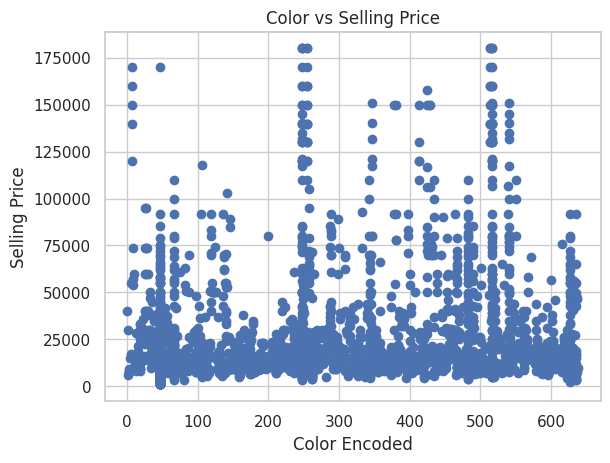

In [35]:
color_vs_price.sort_values(by='Color_Encoded', inplace=True)
plt.figure()
plt.scatter(color_vs_price['Color_Encoded'], color_vs_price['Selling Price'])
plt.xlabel('Color Encoded')
plt.ylabel('Selling Price')
plt.title('Color vs Selling Price')
plt.show()

In [36]:
correlation = data['Selling Price'].corr(data['Discount'])
correlation

0.19083919300202232

In [37]:
correlation = data['Selling Price'].corr(data['discount percentage'])
correlation

-0.06459367889478382

In [38]:
#data['Selling Price'].mean()

25842.448436460414